In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

### CLustering Online Retail

In [3]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.float_format', lambda x: '%.1f' % x)
data = pd.read_excel('Online Retail.xlsx')

In [4]:
df = data.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.dropna(inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [7]:
df = df[~df["InvoiceNo"].str.contains("C", na=False)]

In [8]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [10]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [11]:
import datetime as dt
today_date = df['InvoiceDate'].max() + dt.timedelta(days=2)
today_date

Timestamp('2011-12-11 12:50:00')

In [12]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                    'InvoiceNo': lambda inv: inv.nunique(),
                                    'TotalPrice': lambda price: price.sum()})

In [13]:
rfm.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,327,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,20,1,1757.55
12350.0,311,1,334.40


In [14]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,327,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,20,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,279,1,180.60
18281.0,182,1,80.82
18282.0,9,2,178.05


In [15]:
""" Buat Quartile """
Q1 = rfm['Monetary'].quantile(0.25)
Q3 = rfm['Monetary'].quantile(0.75)
""" IQR """
IQR = Q3 - Q1
IQR



1354.3950000000002

In [16]:
""" Batas atas dan bawah """
lowwer_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

lowwer_limit, upper_limit


(-1724.3475000000003, 3693.2325)

In [17]:
rfm[(rfm['Monetary'] > lowwer_limit) & (rfm['Monetary'] < upper_limit)]


,Recency,Frequency,Monetary
CustomerID,,,
12348.0,76,4,1797.24
12349.0,20,1,1757.55
12350.0,311,1,334.40
12352.0,37,8,2506.04
12353.0,205,1,89.00
...,...,...,...
18280.0,279,1,180.60
18281.0,182,1,80.82
18282.0,9,2,178.05


In [18]:
""" Simpan data no outlier ke variable baru """
# rfm = rfm[(rfm['Recency'] > lowwer_limit) & (rfm['Recency'] < upper_limit)]
# rfm = rfm[(rfm['Frequency'] > lowwer_limit) & (rfm['Frequency'] < upper_limit)]
rfm = rfm[(rfm['Monetary'] > lowwer_limit) & (rfm['Monetary'] < upper_limit)]
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12348.0,76,4,1797.24
12349.0,20,1,1757.55
12350.0,311,1,334.40
12352.0,37,8,2506.04
12353.0,205,1,89.00
...,...,...,...
18280.0,279,1,180.60
18281.0,182,1,80.82
18282.0,9,2,178.05


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(rfm)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,911.018198,15.594596
1,873.846583,-42.100713
2,-560.814448,185.426081
3,1620.857839,8.087283
4,-801.266682,68.636210
...,...,...
3907,-713.042010,146.629531
3908,-808.417643,45.295879
3909,-703.602144,-123.219298
3910,1211.542292,-42.165303


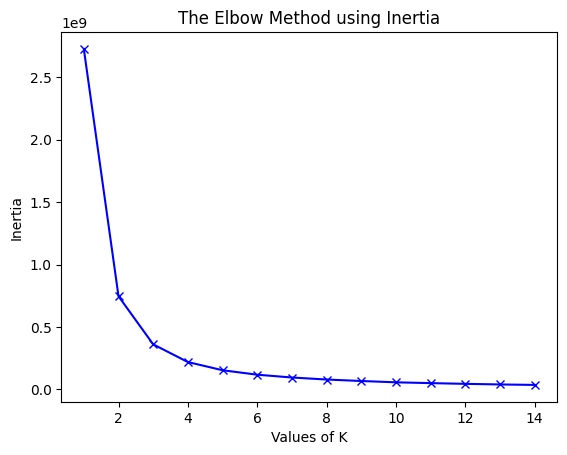

In [20]:
from sklearn.cluster import KMeans

inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(rfm)
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [21]:
kmean_model = KMeans(3)
y = kmean_model.fit_predict(rfm)

rfm["Segment"] = y
rfm

,Recency,Frequency,Monetary,Segment
CustomerID,,,,
12348.0,76,4,1797.24,1
12349.0,20,1,1757.55,1
12350.0,311,1,334.40,0
12352.0,37,8,2506.04,2
12353.0,205,1,89.00,0
...,...,...,...,...
18280.0,279,1,180.60,0
18281.0,182,1,80.82,0
18282.0,9,2,178.05,0


In [22]:
value_counts = rfm['Segment'].value_counts()
value_counts

0    2483
1     965
2     464
Name: Segment, dtype: int64

In [23]:
rfm.groupby("Segment").mean()

,Recency,Frequency,Monetary
Segment,,,
0,127.166331,1.717680,376.260271
1,61.684974,4.108808,1327.227845
2,41.592672,6.793103,2699.734420


<Axes: xlabel='Segment', ylabel='count'>

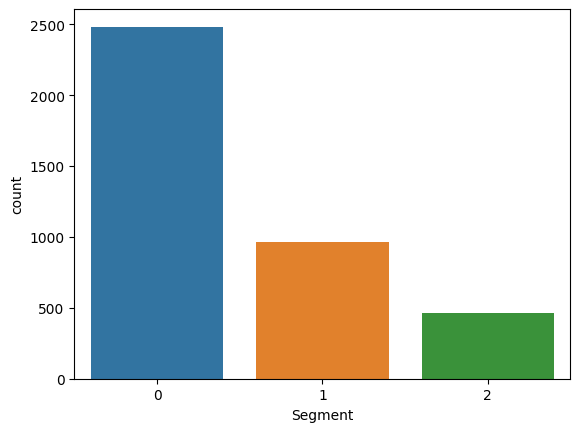

In [24]:
#Visualization
sns.countplot(x='Segment', data=rfm)

### Klasifikasi

In [25]:
rfm

,Recency,Frequency,Monetary,Segment
CustomerID,,,,
12348.0,76,4,1797.24,1
12349.0,20,1,1757.55,1
12350.0,311,1,334.40,0
12352.0,37,8,2506.04,2
12353.0,205,1,89.00,0
...,...,...,...,...
18280.0,279,1,180.60,0
18281.0,182,1,80.82,0
18282.0,9,2,178.05,0


In [26]:
x = rfm.iloc[:, 0:-1].values
y = rfm.iloc[:, -1].values
# X = data.iloc[:,:-1].values
# y = data.iloc[:,-1].values
print(x)

[[7.60000e+01 4.00000e+00 1.79724e+03]
 [2.00000e+01 1.00000e+00 1.75755e+03]
 [3.11000e+02 1.00000e+00 3.34400e+02]
 ...
 [9.00000e+00 2.00000e+00 1.78050e+02]
 [5.00000e+00 1.60000e+01 2.09488e+03]
 [4.40000e+01 3.00000e+00 1.83728e+03]]


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 0)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[-0.83137847,  0.86081271,  0.31621393],
       [ 0.72962887,  0.04850694, -0.18940092],
       [-0.7918593 ,  3.29773003,  1.11297358],
       ...,
       [-0.13979294, -0.76379884, -0.26829247],
       [-0.26823025,  0.86081271, -0.61189766],
       [ 1.95472324, -0.76379884, -0.06027796]])

In [29]:
from sklearn.neighbors import KNeighborsClassifier
## Train the model using KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)


KNeighborsClassifier()

In [30]:
y_pred_knn = knn_model.predict(x_test)

In [31]:
# melakukan prediksi pada data pengujian
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred_knn)
print('Akurasi:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))

Akurasi: 0.9676320272572402
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       728
           1       0.94      0.93      0.94       301
           2       0.96      0.92      0.94       145

    accuracy                           0.97      1174
   macro avg       0.96      0.95      0.95      1174
weighted avg       0.97      0.97      0.97      1174



<Axes: >

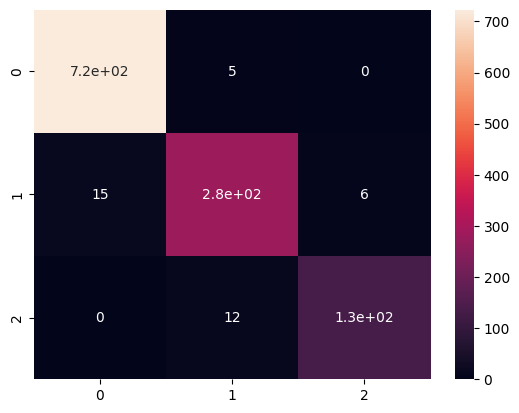

In [32]:
# menghitung confusion matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sb

sb.heatmap(confusion_matrix(y_test,y_pred_knn), annot=True)

In [33]:
from sklearn.metrics import accuracy_score
print("The accuracy of KNN model is : ", accuracy_score(y_test, y_pred_knn)*100, "%")

The accuracy of KNN model is :  96.76320272572401 %


In [34]:
from sklearn.metrics import mean_absolute_error,r2_score

def calculate_regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print('R2 Score:', r2)
    print('MAE:', mae)
    
calculate_regression_metrics(y_test,y_pred_knn)

R2 Score: 0.9348742286642735
MAE: 0.03236797274275979


In [35]:
# y_pred_knn

In [41]:
# Misalkan input_data berisi atribut yang ingin diprediksi
# Ganti dengan atribut yang Anda inginkan
input_data = np.array([[76,4,1797.24]])

# Normalisasi data input
input_data = scaler.transform(input_data)

# Melakukan prediksi pada data input
prediction = knn_model.predict(input_data)

# Mengonversi label prediksi menjadi keterangan yang lebih mudah dibaca
if prediction == 0:
    result = "Cluster 0"
elif prediction == 1:   
    result = "Cluster 1"
else:
    result = "Cluster 2"

print("Hasil Prediksi:", result)


Hasil Prediksi: Cluster 1


In [42]:
# Menyimpan data yang telah diproses
rfm.to_excel('rfm.xlsx', index=False)

In [38]:
import joblib
joblib.dump(kmean_model, "kmean_model.pkl")

['kmean_model.pkl']

In [39]:
import pickle
filename = 'knn_model.pkl'
pickle.dump(knn_model, open(filename, 'wb'))

In [47]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [40]:
load_model = pickle.load(open(filename, 'rb'))
result = load_model.score(x_test, y_test)
print(result,'% Akurasi')

0.9676320272572402 % Akurasi
